In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime as dt
import collections

In [2]:
xlsx = pd.ExcelFile('KPMG_VI_New_raw_data_update_final.xlsx')

Sprocket Central Pty Ltd is a long-standing KPMG client whom specialises in high-quality bikes and accessible cycling accessories to riders. Their marketing team is looking to boost

Task 1:  
the importance of optimising the quality of customer datasets cannot be underestimated. The better the quality of the dataset, the better chance you will be able to use it drive company growth.”   
identifying the data quality issues and strategies to mitigate these issues.

Task 2:   
The marketing team at Sprocket Central Pty Ltd is sure that, if correctly analysed, the data would reveal useful customer insights which could help optimise resource allocation for targeted marketing. Hence, improve performance by focusing on high value customers.   
Using the existing 3 datasets (Customer demographic, customer address and transactions) as a labelled dataset, please recommend which of these 1000 new customers should be targeted to drive the most value for the organisation.    
Data Exploration; Model Development and Interpretation.   
Please ensure your PowerPoint presentation includes a detailed approach for our strategy behind each of the 3 phases including activities involved in each - i.e. understanding the data distributions, feature engineering, data transformations, modelling, results interpretation and reporting. This detailed plan needs to be presented to the client to get a sign-off.

What are the trends in the underlying data?   
Which customer segment has the highest customer value?   
What do you propose should be Sprocket Central Pty Ltd ’s marketing and growth strategy?   
What additional external datasets may be useful to obtain greater insights into customer preferences and propensity to purchase the products?   

## Summary

In [3]:
Transactions = pd.read_excel(xlsx, 
                            'Transactions',
                            skiprows=[0])#how to skip the first row of the excel file

In [4]:
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [5]:
len(Transactions)

20000

In [6]:
Transactions['transaction_id'].nunique()

20000

In [7]:
Transactions['customer_id'].nunique()

3494

In [8]:
Customer_Demographic = pd.read_excel(xlsx, 
                            'CustomerDemographic',
                            skiprows=[0])

In [9]:
Customer_Demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,1;DROP TABLE users,No,6.0
1,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,No,5.0
2,3410,Merrili,Brittin,Female,93,1940-09-22,NaN,Property,Mass Customer,N,á,No,16.0
3,2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,á,Yes,17.0
4,658,Donn,Bonnell,Male,38,1944-01-24,Tax Accountant,Manufacturing,Affluent Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,Yes,8.0


In [10]:
len(Customer_Demographic)

4000

In [11]:
Customer_Demographic['customer_id'].nunique()

4000

In [12]:
Customer_Address = pd.read_excel(xlsx, 
                            'CustomerAddress',
                            skiprows=[0])

In [13]:
Customer_Address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [14]:
len(Customer_Address)

3999

In [15]:
Customer_Address['customer_id'].nunique()

3999

## Transactions

In [16]:
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [17]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [18]:
Transactions = Transactions.dropna()

In [19]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [20]:
Transactions = Transactions.drop(['product_first_sold_date'], axis=1)

In [21]:
Transactions['profit'] = Transactions['list_price'] - Transactions['standard_cost']

In [22]:
Transactions['profit_margin'] = round(((Transactions['list_price'] - Transactions['standard_cost'])/Transactions['list_price']*100)
                                      ,2)

In [23]:
Transactions['transaction_month'] = Transactions.transaction_date.map(lambda x: x.month)

In [24]:
# Transactions.apply(lambda x: x[3].month,axis = 1)
# This will work as the above code

In [25]:
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
Transactions['weekday'] = Transactions['transaction_date'].dt.dayofweek.map(dayOfWeek)

In [26]:
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,profit,profit_margin,transaction_month,weekday
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,17.87,25.00,2,Saturday
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1702.55,81.40,5,Sunday
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1544.61,86.13,10,Monday
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,817.36,68.20,8,Thursday
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1055.82,59.81,10,Sunday


<AxesSubplot:xlabel='online_order', ylabel='count'>

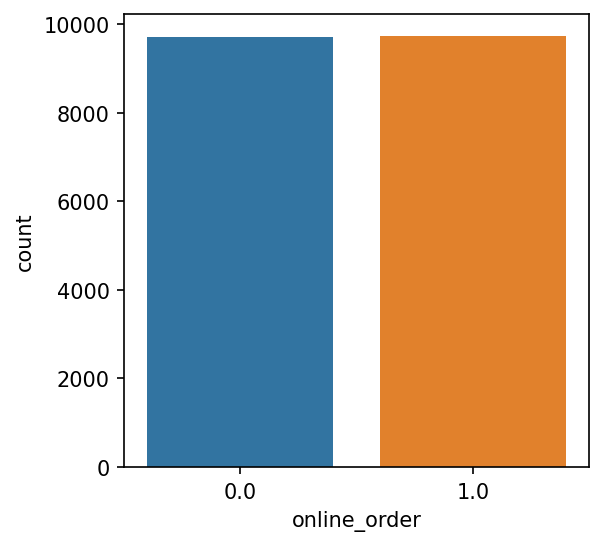

In [27]:
plt.figure(figsize=(4,4), dpi=150)
sns.countplot(data=Transactions, x='online_order')

<AxesSubplot:xlabel='order_status', ylabel='count'>

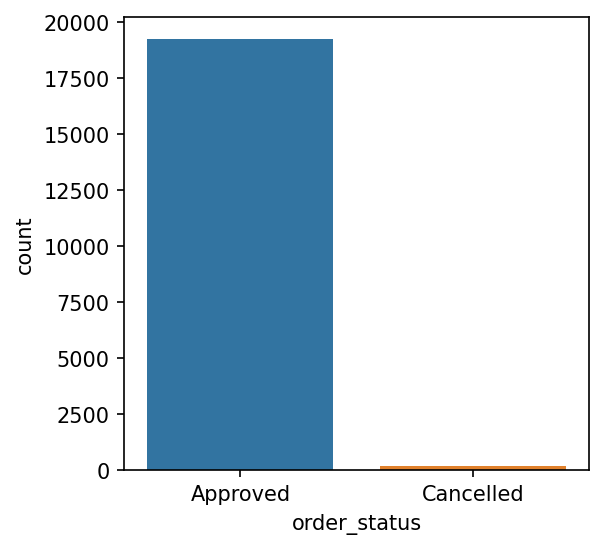

In [28]:
plt.figure(figsize=(4,4), dpi=150)
sns.countplot(data=Transactions, x='order_status')

<AxesSubplot:xlabel='brand', ylabel='count'>

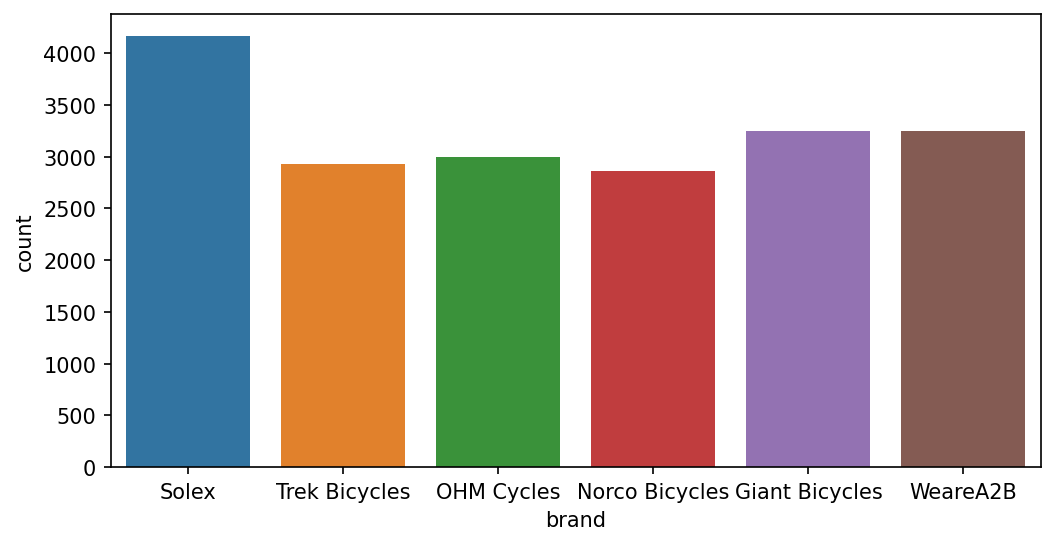

In [29]:
plt.figure(figsize=(8,4), dpi=150)
sns.countplot(data=Transactions, x='brand')

<AxesSubplot:xlabel='product_line', ylabel='count'>

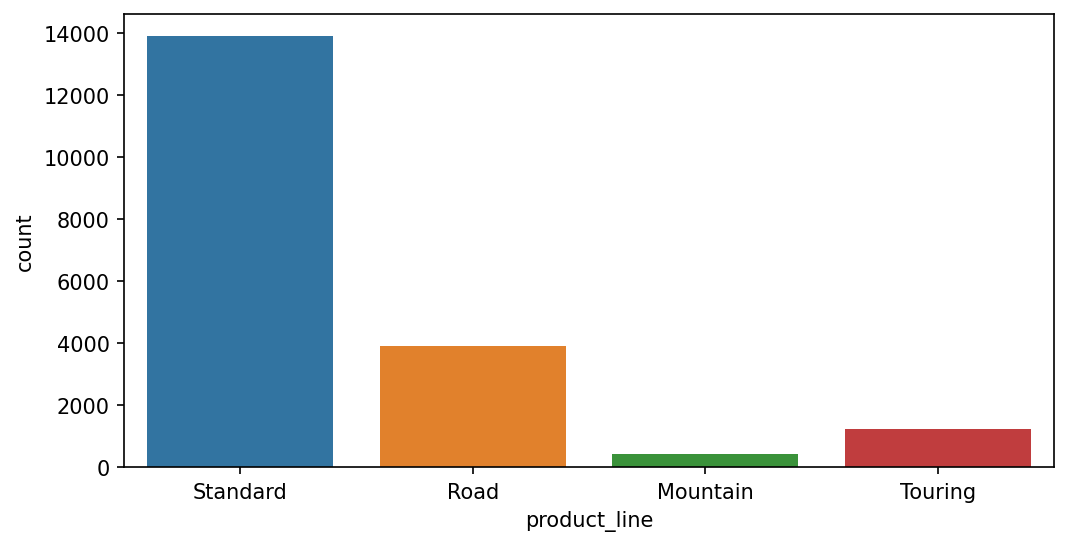

In [30]:
plt.figure(figsize=(8,4), dpi=150)
sns.countplot(data=Transactions, x='product_line')

<AxesSubplot:xlabel='product_class', ylabel='count'>

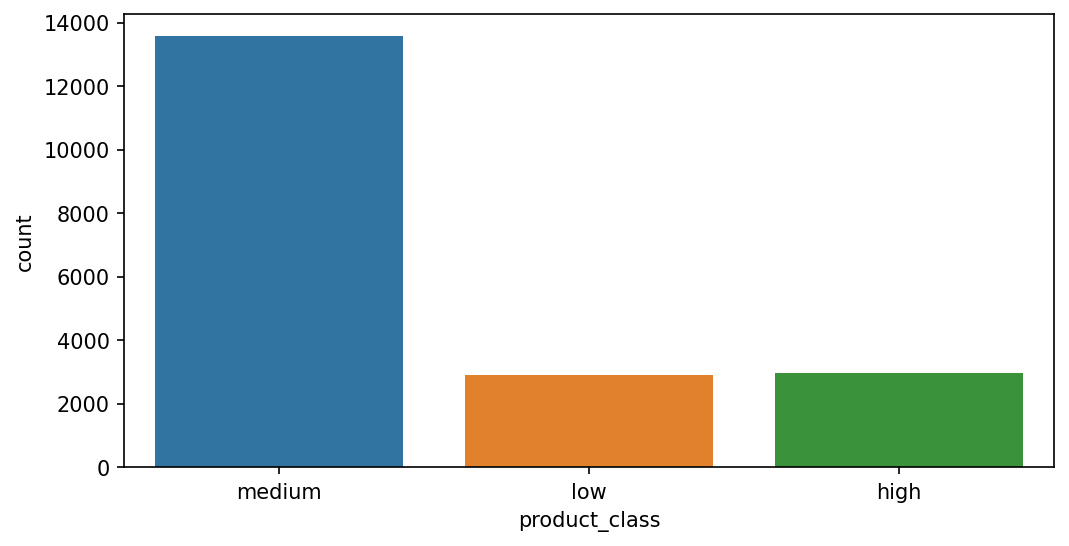

In [31]:
plt.figure(figsize=(8,4), dpi=150)
sns.countplot(data=Transactions, x='product_class')

<AxesSubplot:xlabel='product_size', ylabel='count'>

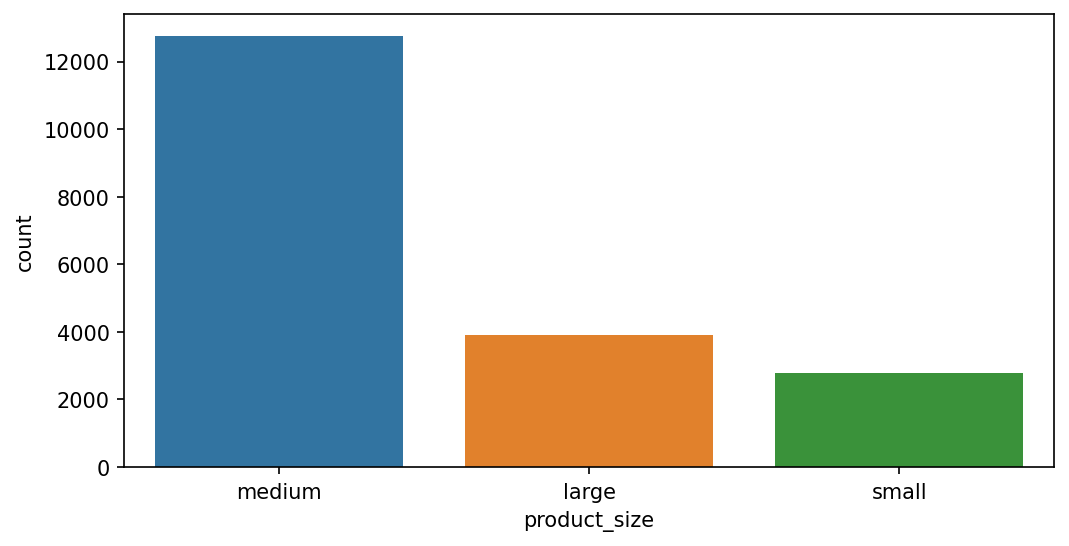

In [32]:
plt.figure(figsize=(8,4), dpi=150)
sns.countplot(data=Transactions, x='product_size')

In [33]:
subsaleDf=Transactions.sort_values(by=["brand","product_line","product_class","product_size"],ascending=True)
subsaleDf.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,profit,profit_margin,transaction_month,weekday
218,219,2,3307,2017-11-13,0.0,Approved,Giant Bicycles,Road,low,small,590.26,525.33,64.93,11.0,11,Monday
222,223,2,2698,2017-11-30,0.0,Approved,Giant Bicycles,Road,low,small,590.26,525.33,64.93,11.0,11,Thursday
252,253,2,3123,2017-12-30,0.0,Approved,Giant Bicycles,Road,low,small,590.26,525.33,64.93,11.0,12,Saturday
471,472,2,1304,2017-02-09,1.0,Approved,Giant Bicycles,Road,low,small,590.26,525.33,64.93,11.0,2,Thursday
504,505,66,2560,2017-07-09,0.0,Approved,Giant Bicycles,Road,low,small,590.26,525.33,64.93,11.0,7,Sunday


In [34]:
dit = collections.defaultdict(int)
for idx, row in subsaleDf.iterrows():
    dit[(row[6],row[7],row[7],row[8])] += 1
    
    
ranking = pd.DataFrame(dit.items())
ranking.sort_values(by=1,ascending=False)

,0,1
20,"(Solex, Standard, Standard, medium)",2490
30,"(WeareA2B, Standard, Standard, medium)",2309
3,"(Giant Bicycles, Standard, Standard, medium)",1731
27,"(Trek Bicycles, Standard, Standard, medium)",1234
15,"(OHM Cycles, Standard, Standard, medium)",1066
10,"(Norco Bicycles, Standard, Standard, medium)",966
2,"(Giant Bicycles, Standard, Standard, high)",767
7,"(Norco Bicycles, Road, Road, medium)",722
31,"(WeareA2B, Touring, Touring, medium)",611
24,"(Trek Bicycles, Road, Road, medium)",606


<AxesSubplot:xlabel='transaction_month', ylabel='count'>

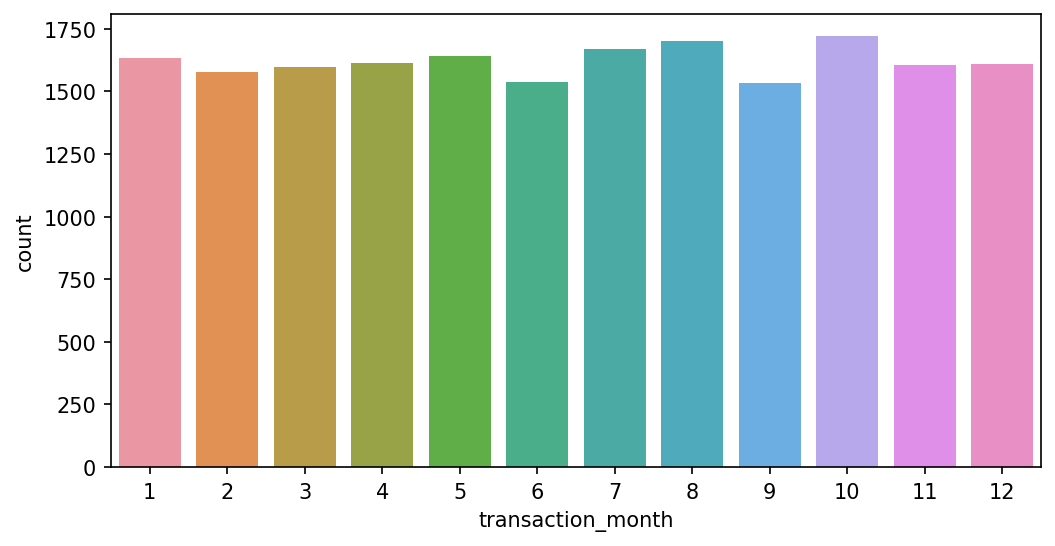

In [35]:
plt.figure(figsize=(8,4), dpi=150)
sns.countplot(data=Transactions, x='transaction_month')

<AxesSubplot:xlabel='weekday', ylabel='count'>

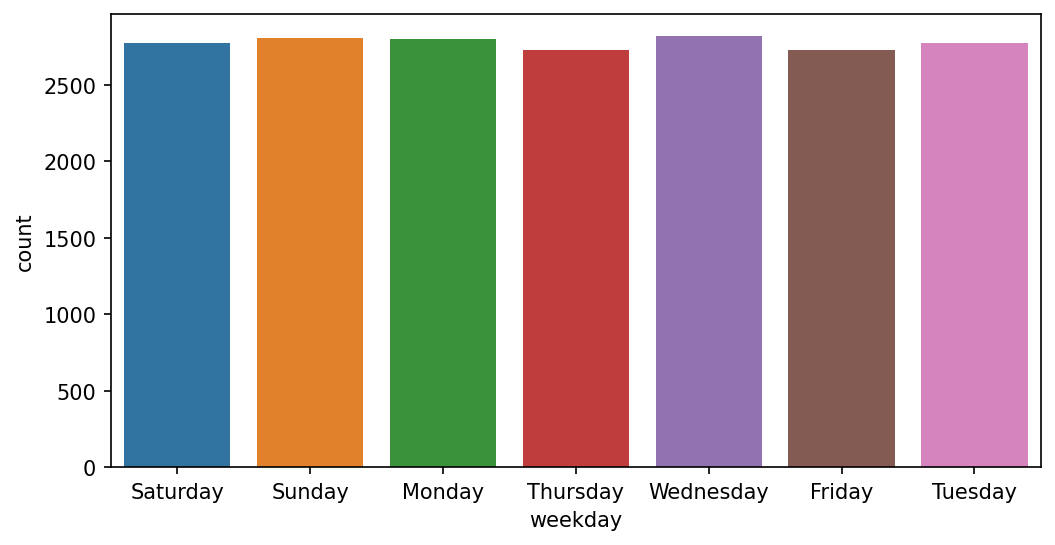

In [36]:
plt.figure(figsize=(8,4), dpi=150)
sns.countplot(data=Transactions, x='weekday')

<Figure size 1500x1200 with 0 Axes>

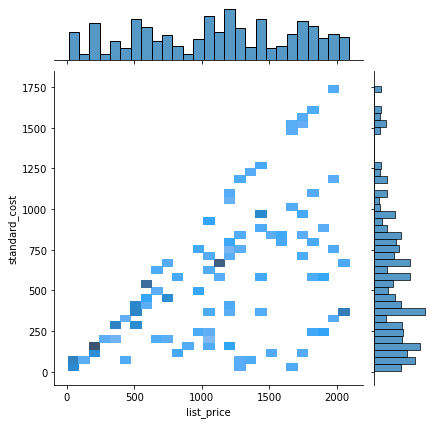

In [37]:
plt.figure(figsize=(10,8), dpi=150)
sns.jointplot(data=Transactions, x='list_price', y='standard_cost', kind='hist')

<Figure size 1500x1200 with 0 Axes>

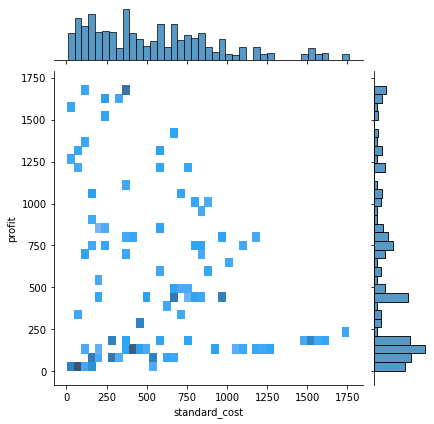

In [38]:
plt.figure(figsize=(10,8), dpi=150)
sns.jointplot(data=Transactions, x='standard_cost', y='profit', kind='hist')

<Figure size 1500x1200 with 0 Axes>

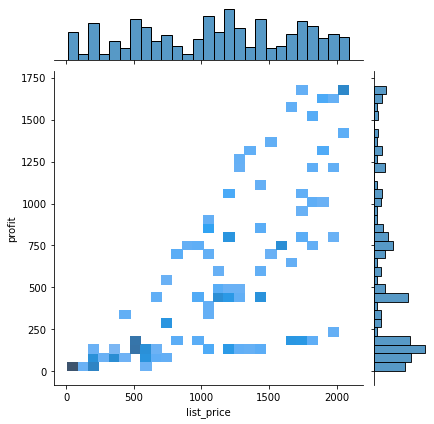

In [39]:
plt.figure(figsize=(10,8), dpi=150)
sns.jointplot(data=Transactions, x='list_price', y='profit', kind='hist')

In [40]:
# Transactions.set_index('transaction_date').to_period("M").reset_index()

In [41]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_id     19445 non-null  int64         
 1   product_id         19445 non-null  int64         
 2   customer_id        19445 non-null  int64         
 3   transaction_date   19445 non-null  datetime64[ns]
 4   online_order       19445 non-null  float64       
 5   order_status       19445 non-null  object        
 6   brand              19445 non-null  object        
 7   product_line       19445 non-null  object        
 8   product_class      19445 non-null  object        
 9   product_size       19445 non-null  object        
 10  list_price         19445 non-null  float64       
 11  standard_cost      19445 non-null  float64       
 12  profit             19445 non-null  float64       
 13  profit_margin      19445 non-null  float64       
 14  transa

In [42]:
#每个月的平均sale,cost, profit的趋势
Average_Values = Transactions.sort_values("transaction_date").groupby("transaction_month").mean()

In [68]:
Average_Values

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,profit,profit_margin
transaction_month,,,,,,,,
1,9965.339657,45.935129,1719.059976,0.507956,1110.736530,550.668378,560.068152,45.125037
2,10124.608365,44.516477,1721.171103,0.504436,1105.536318,565.286489,540.249829,43.878758
3,10055.626800,46.555416,1704.392611,0.484033,1097.444571,555.608284,541.836287,44.385554
4,9814.586485,44.528828,1767.665220,0.508369,1110.887489,559.829281,551.058208,44.114048
5,9975.510055,45.906764,1751.567337,0.501523,1136.220999,585.335436,550.885564,43.459970
6,10032.242030,46.310995,1784.115810,0.492518,1112.417189,564.716955,547.700234,44.574483
7,9902.728144,45.461677,1732.104192,0.485629,1100.505054,549.799790,550.705263,44.431407
8,9935.758074,46.116853,1709.335291,0.513212,1105.137769,546.490517,558.647252,45.378356
9,10173.318123,45.745763,1738.119296,0.495437,1107.118931,557.095378,550.023553,44.855319


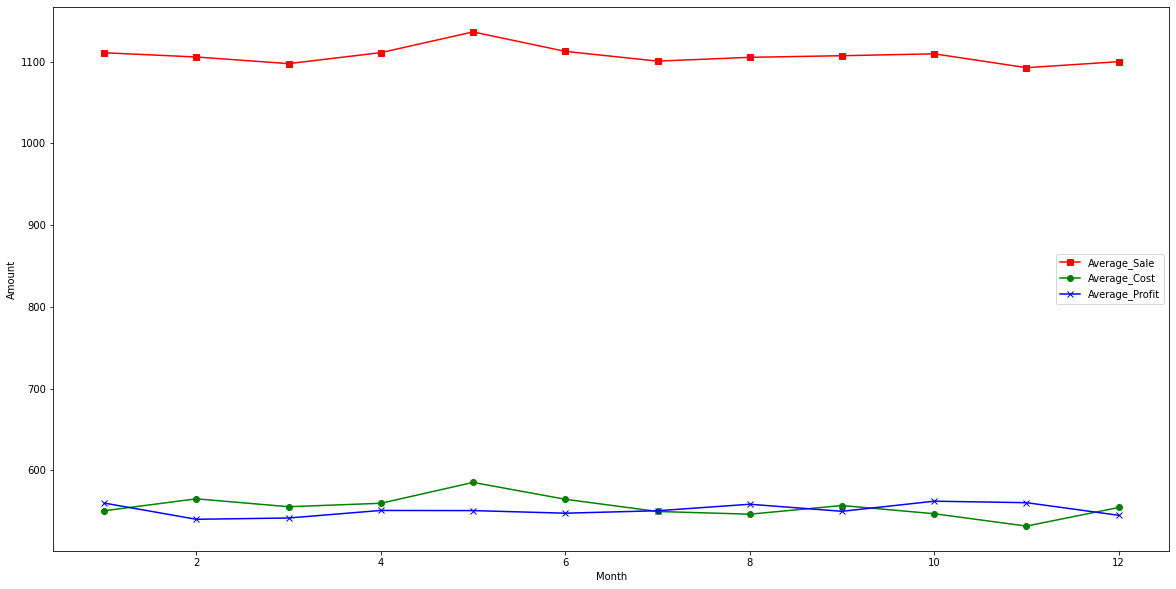

In [74]:
plt.figure(figsize=(20,10))
x = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.plot(x,Average_Values['list_price'],'s-',color = 'r',label="Average_Sale")
plt.plot(x,Average_Values['standard_cost'],'o-',color = 'g',label="Average_Cost")
plt.plot(x,Average_Values['profit'],'x-',color = 'b',label="Average_Profit")
plt.xlabel("Month")#横坐标名字
plt.ylabel("Amount")#纵坐标名字
plt.legend(loc = "best")#图例
plt.show()

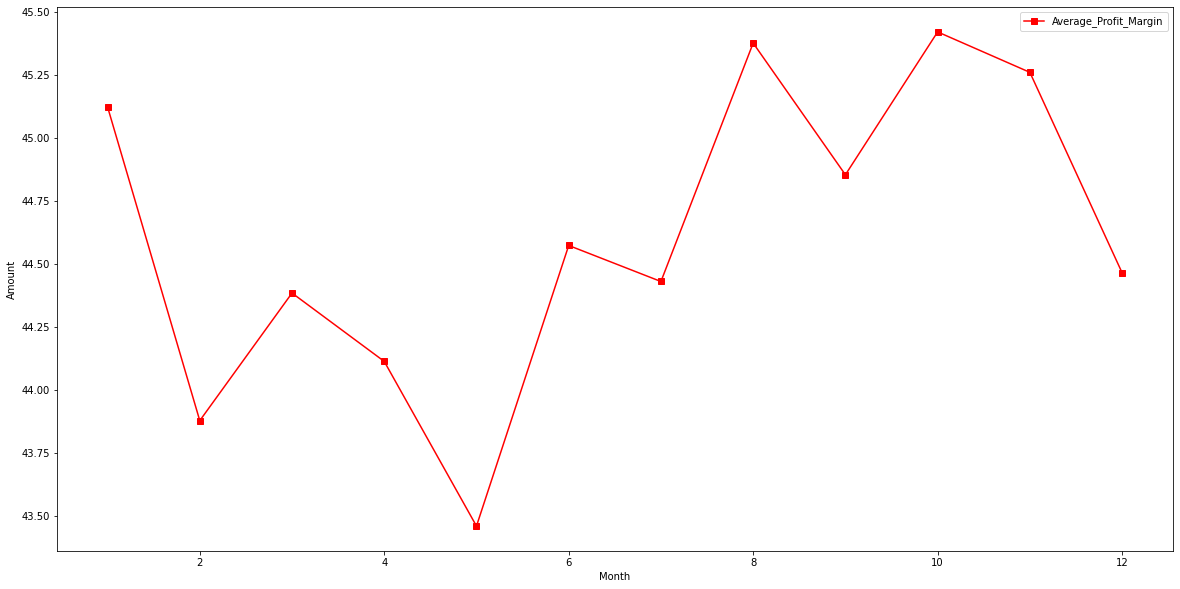

In [82]:
plt.figure(figsize=(20,10))
x = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.plot(x,Average_Values['profit_margin'],'s-',color = 'r',label="Average_Profit_Margin")
plt.xlabel("Month")#横坐标名字
plt.ylabel("Amount")#纵坐标名字
plt.legend(loc = "best")#图例
plt.show()

In [43]:
# Transactions.sort_values("transaction_date")

In [44]:
# Transactions.sort_values("transaction_date")['profit'].rolling(window=3).mean()

## Customer_Demographic

In [45]:
Customer_Demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,1;DROP TABLE users,No,6.0
1,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,No,5.0
2,3410,Merrili,Brittin,Female,93,1940-09-22,NaN,Property,Mass Customer,N,á,No,16.0
3,2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,á,Yes,17.0
4,658,Donn,Bonnell,Male,38,1944-01-24,Tax Accountant,Manufacturing,Affluent Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,Yes,8.0


In [46]:
Customer_Demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [47]:
def from_dob_to_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [48]:
Customer_Demographic['Age'] = Customer_Demographic['DOB'].apply(lambda x: from_dob_to_age(x))

In [49]:
Customer_Demographic.loc[Customer_Demographic['Age'] < 100, 'Age_category(yrs.)'] = 'Senior Citizen(61-100)'
Customer_Demographic.loc[Customer_Demographic['Age'] < 60, 'Age_category(yrs.)'] = 'Senior Adult(50-60)'
Customer_Demographic.loc[Customer_Demographic['Age'] < 49, 'Age_category(yrs.)'] = 'Adult(25-49)'
Customer_Demographic.loc[Customer_Demographic['Age'] < 24, 'Age_category(yrs.)'] = 'Youth(<24)'

Customer_Demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,Age,Age_category(yrs.)
0,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,1;DROP TABLE users,No,6.0,89.0,Senior Citizen(61-100)
1,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,No,5.0,85.0,Senior Citizen(61-100)
2,3410,Merrili,Brittin,Female,93,1940-09-22,NaN,Property,Mass Customer,N,á,No,16.0,80.0,Senior Citizen(61-100)
3,2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,á,Yes,17.0,77.0,Senior Citizen(61-100)
4,658,Donn,Bonnell,Male,38,1944-01-24,Tax Accountant,Manufacturing,Affluent Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,Yes,8.0,77.0,Senior Citizen(61-100)


In [79]:
Customer_Demographic.loc[Customer_Demographic['Age'] >= 80, 'Age_category'] = '80-'
Customer_Demographic.loc[Customer_Demographic['Age'] < 80, 'Age_category'] = '70-79'
Customer_Demographic.loc[Customer_Demographic['Age'] < 70, 'Age_category'] = '60-69'
Customer_Demographic.loc[Customer_Demographic['Age'] < 60, 'Age_category'] = '50-59'
Customer_Demographic.loc[Customer_Demographic['Age'] < 50, 'Age_category'] = '40-49'
Customer_Demographic.loc[Customer_Demographic['Age'] < 40, 'Age_category'] = '30-39'
Customer_Demographic.loc[Customer_Demographic['Age'] < 30, 'Age_category'] = '20-29'
Customer_Demographic.loc[Customer_Demographic['Age'] < 20, 'Age_category'] = '<24'

Customer_Demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,Age,Age_category(yrs.),year,Age_category
0,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,1;DROP TABLE users,No,6.0,89.0,Senior Citizen(61-100),1931.0,80-
1,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,No,5.0,85.0,Senior Citizen(61-100),1935.0,80-
2,3410,Merrili,Brittin,Female,93,1940-09-22,NaN,Property,Mass Customer,N,á,No,16.0,80.0,Senior Citizen(61-100),1940.0,80-
3,2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,á,Yes,17.0,77.0,Senior Citizen(61-100),1943.0,70-79
4,658,Donn,Bonnell,Male,38,1944-01-24,Tax Accountant,Manufacturing,Affluent Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,Yes,8.0,77.0,Senior Citizen(61-100),1944.0,70-79


<AxesSubplot:xlabel='Age_category', ylabel='count'>

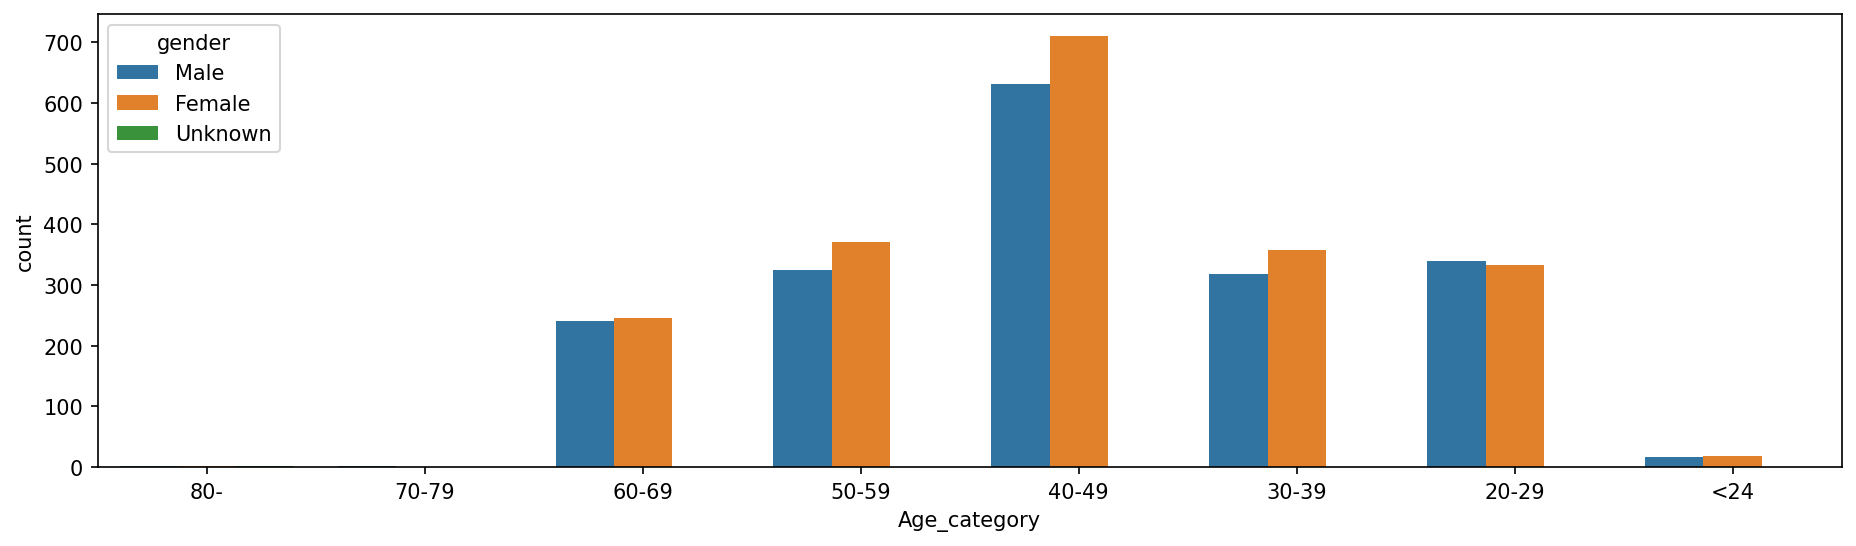

In [81]:
plt.figure(figsize=(15,4), dpi=150)
sns.countplot(data=Customer_Demographic, x='Age_category', hue='gender')

<AxesSubplot:xlabel='Age_category(yrs.)', ylabel='count'>

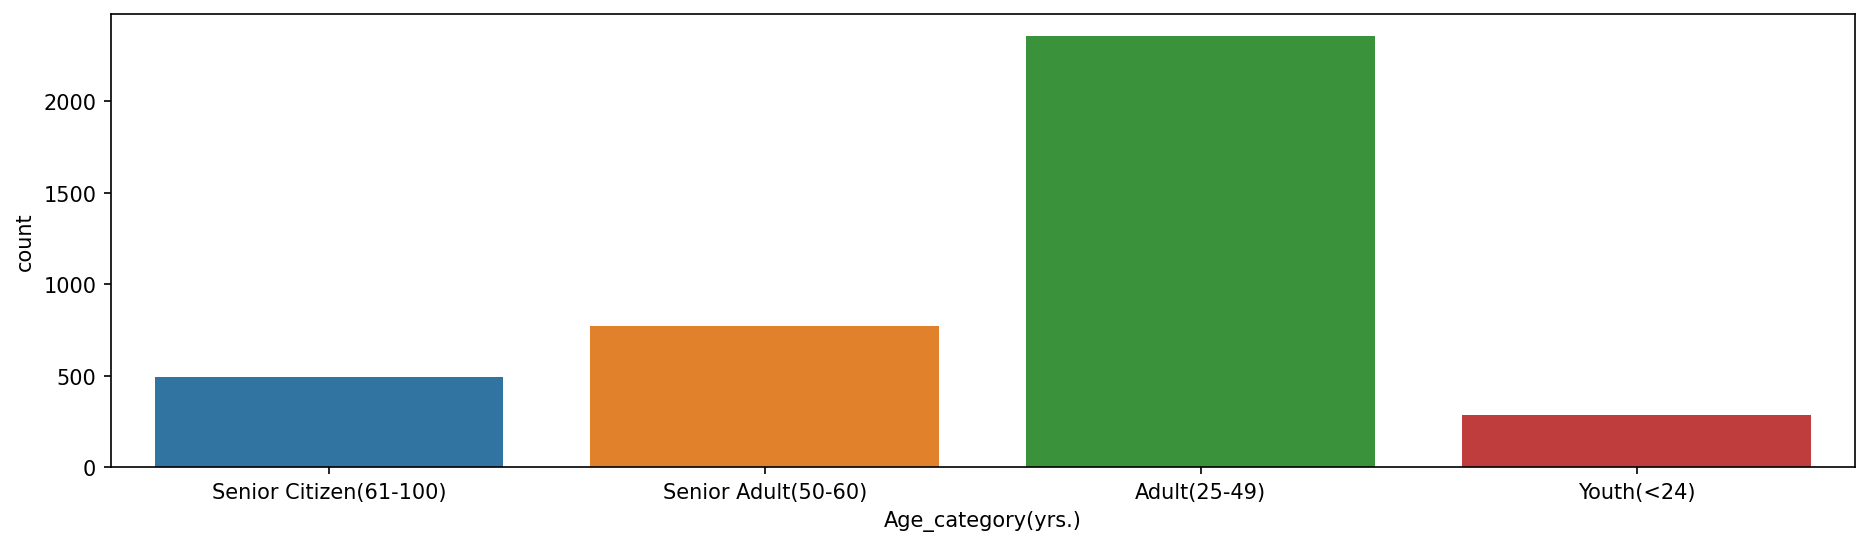

In [50]:
plt.figure(figsize=(15,4), dpi=150)
sns.countplot(data=Customer_Demographic, x='Age_category(yrs.)')

<AxesSubplot:xlabel='Age_category(yrs.)', ylabel='count'>

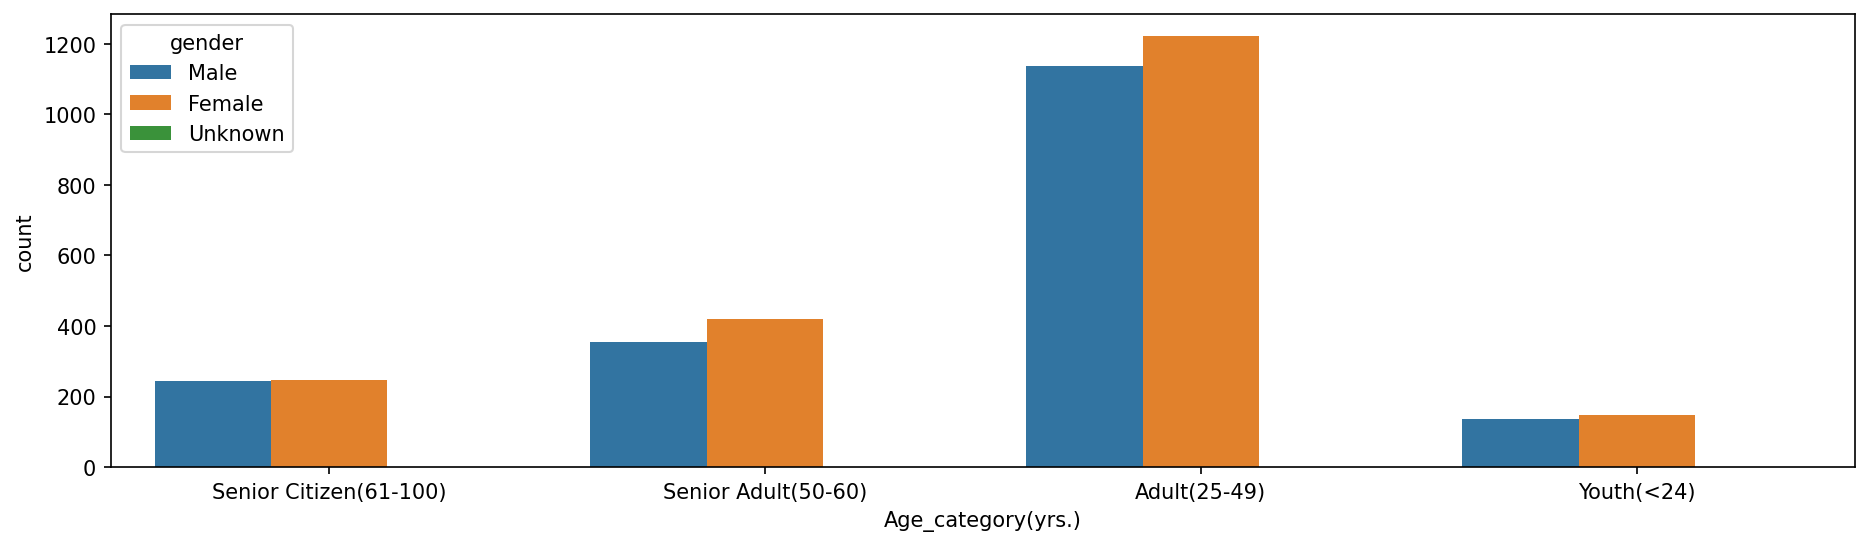

In [75]:
plt.figure(figsize=(15,4), dpi=150)
sns.countplot(data=Customer_Demographic, x='Age_category(yrs.)', hue='gender')

In [51]:
Customer_Demographic['gender'].value_counts()

Female    2037
Male      1872
U           88
M            1
Femal        1
F            1
Name: gender, dtype: int64

In [52]:
gender_dict = {
    "Femal":"Female",
    "Female":"Female",
    "Male":"Male",
    "M":"Male",
    "F":"Female",
    "U":"Unknown",
}
Customer_Demographic['gender'] = Customer_Demographic['gender'].map(gender_dict)

In [53]:
Customer_Demographic['gender'].value_counts()

Female     2039
Male       1873
Unknown      88
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

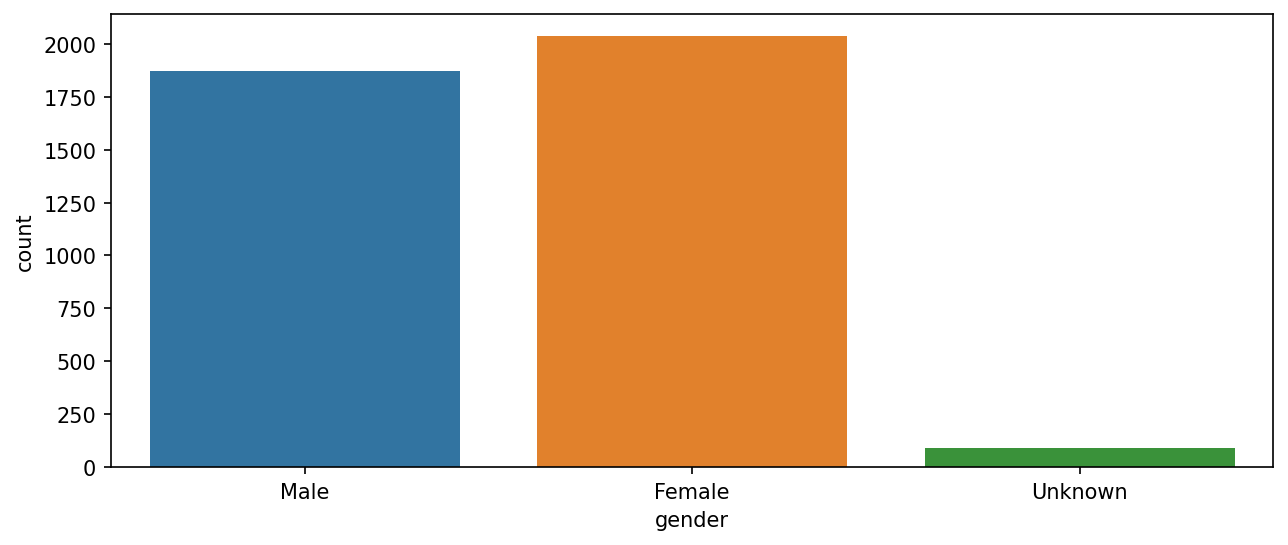

In [54]:
plt.figure(figsize=(10,4), dpi=150)
sns.countplot(data=Customer_Demographic, x='gender')

<AxesSubplot:xlabel='job_title', ylabel='count'>

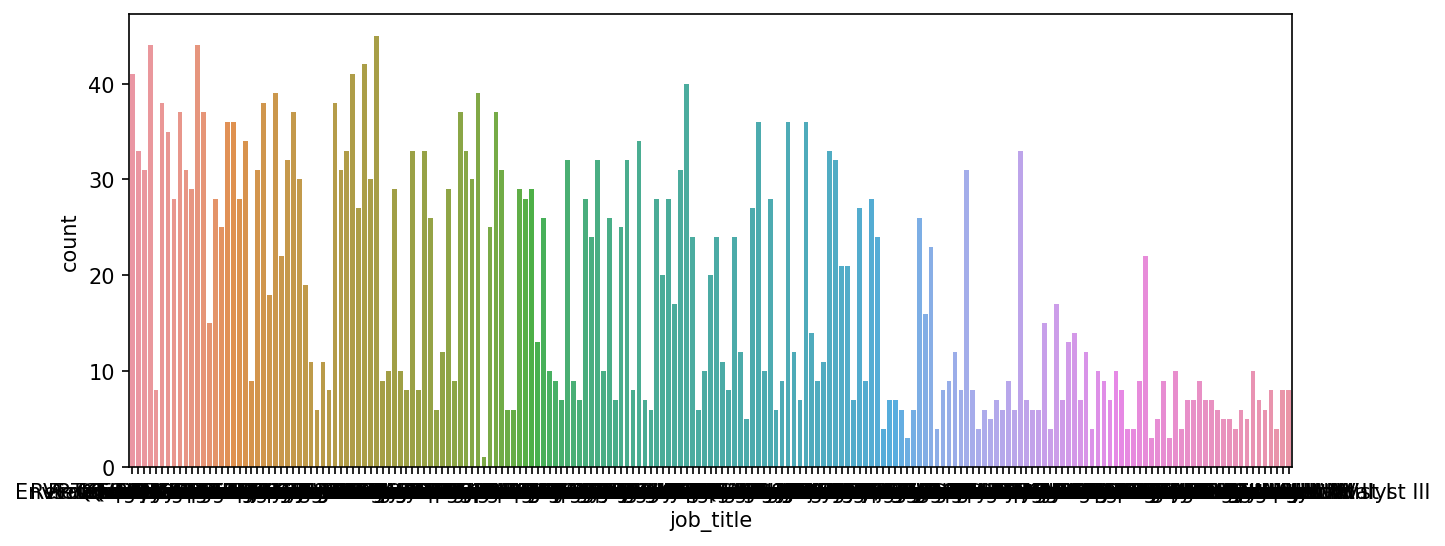

In [55]:
plt.figure(figsize=(10,4), dpi=150)
sns.countplot(data=Customer_Demographic, x='job_title')

<AxesSubplot:xlabel='job_industry_category', ylabel='count'>

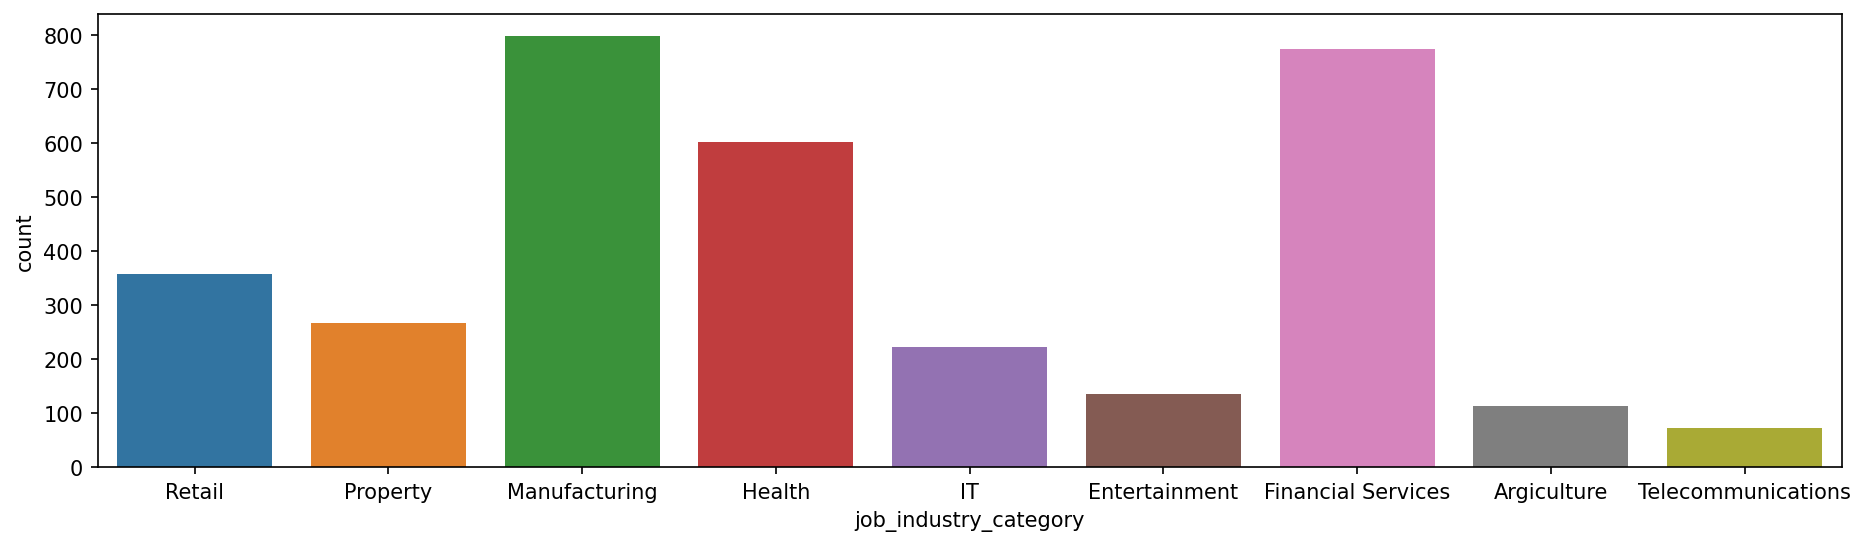

In [56]:
plt.figure(figsize=(15,4), dpi=150)
sns.countplot(data=Customer_Demographic, x='job_industry_category')

<AxesSubplot:xlabel='wealth_segment', ylabel='count'>

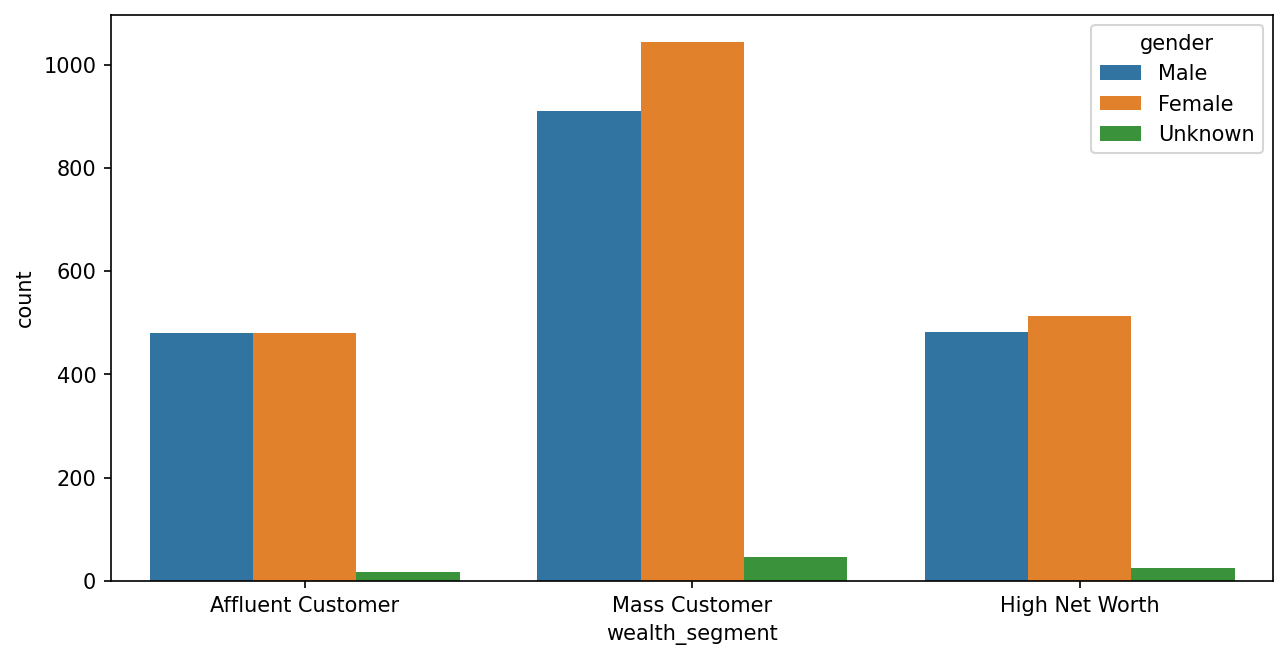

In [83]:
plt.figure(figsize=(10,5), dpi=150)
sns.countplot(data=Customer_Demographic, x='wealth_segment',hue='gender')

In [58]:
Customer_Demographic['deceased_indicator'].value_counts()

N    3998
Y       2
Name: deceased_indicator, dtype: int64

<AxesSubplot:xlabel='owns_car', ylabel='count'>

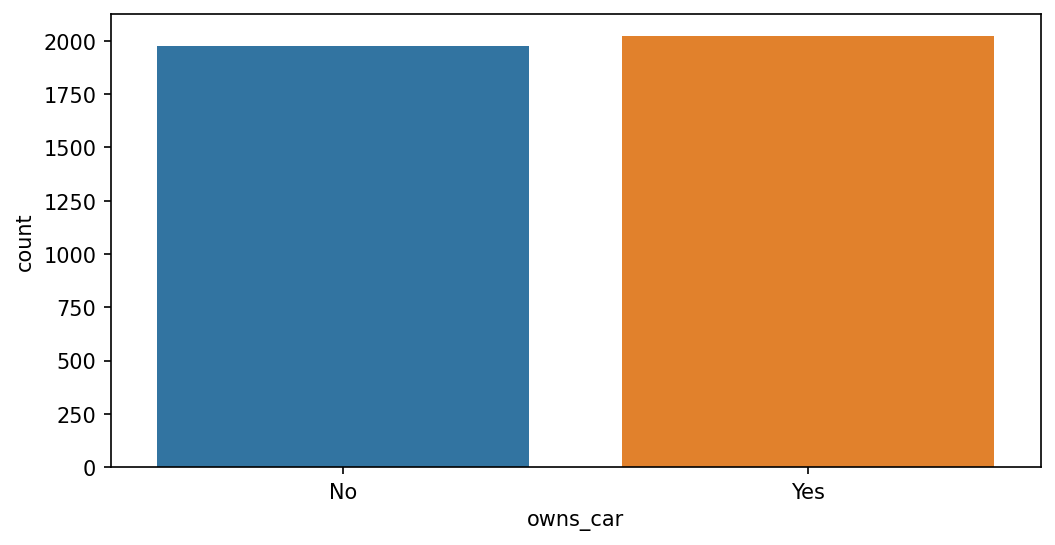

In [59]:
plt.figure(figsize=(8,4), dpi=150)
sns.countplot(data=Customer_Demographic, x='owns_car')

<AxesSubplot:xlabel='tenure', ylabel='count'>

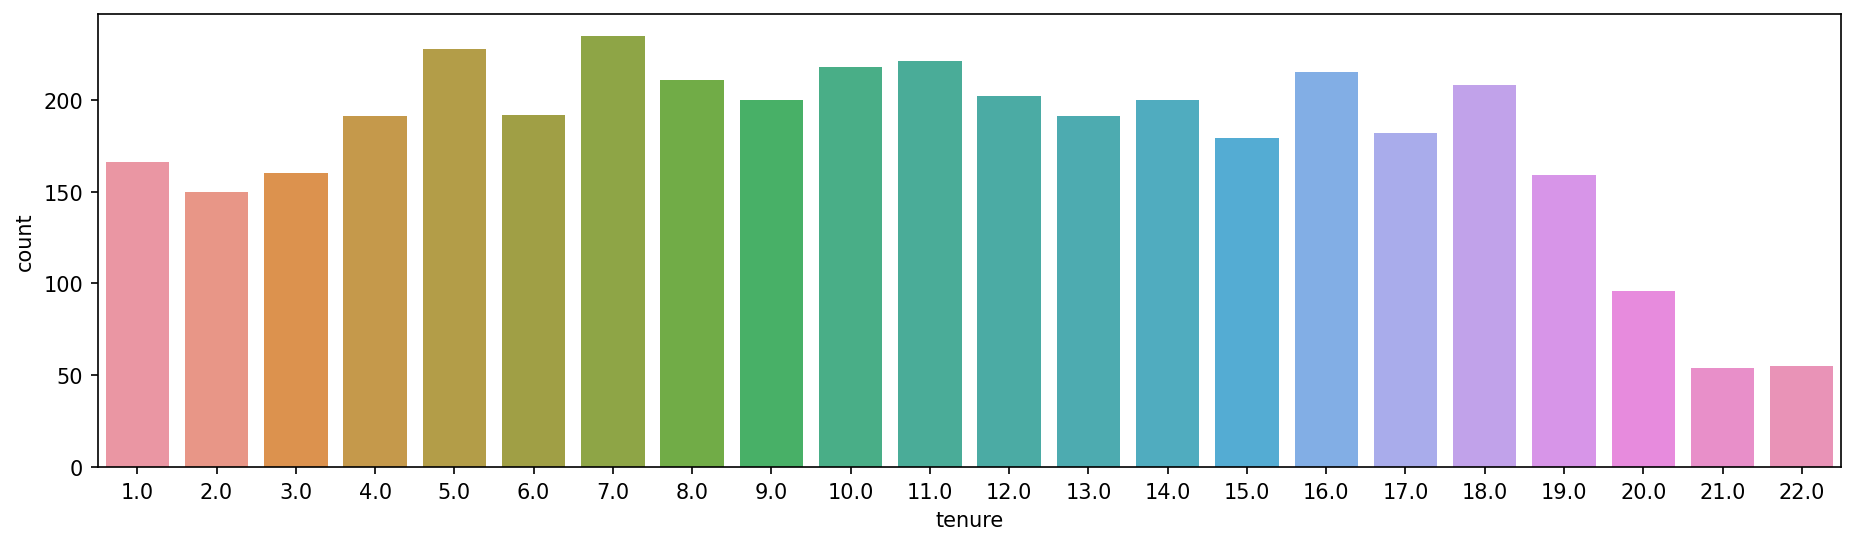

In [60]:
plt.figure(figsize=(15,4), dpi=150)
sns.countplot(data=Customer_Demographic, x='tenure')

<AxesSubplot:xlabel='tenure', ylabel='count'>

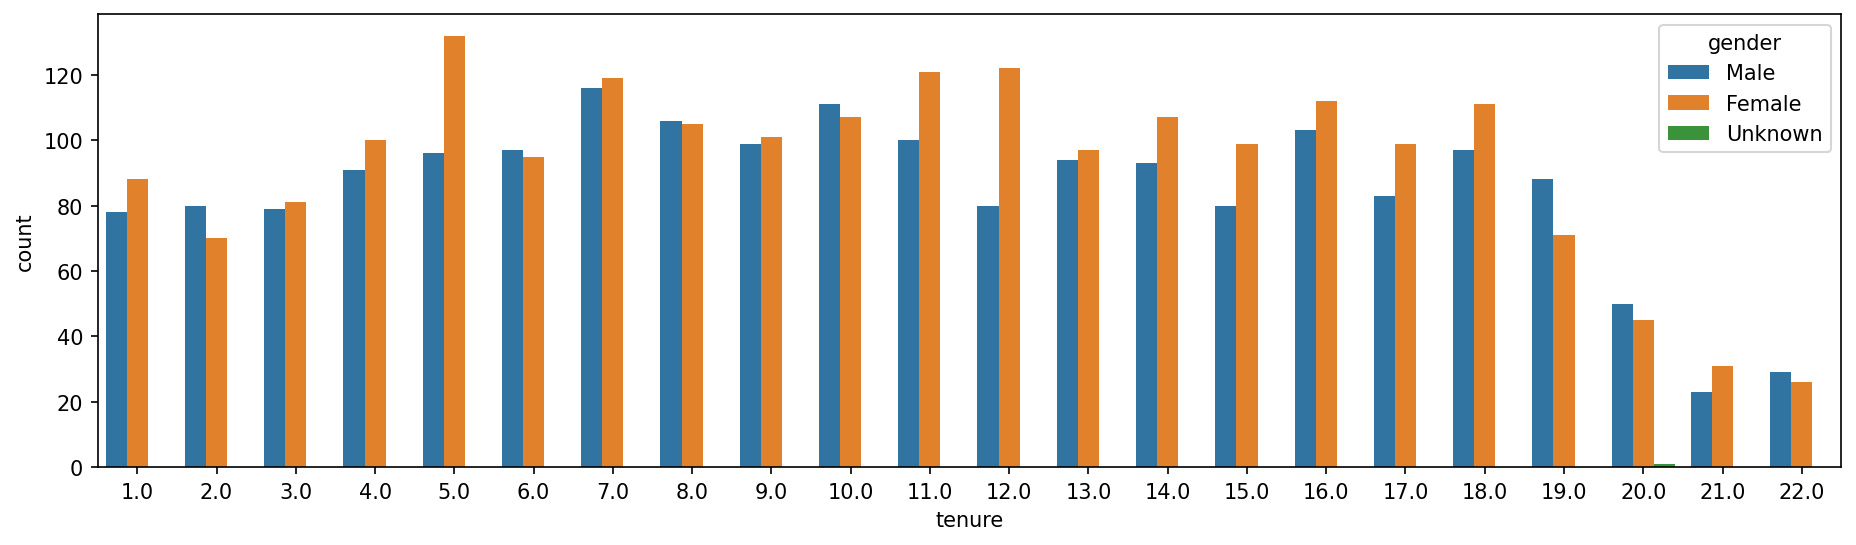

In [77]:
plt.figure(figsize=(15,4), dpi=150)
sns.countplot(data=Customer_Demographic, x='tenure', hue='gender')

In [61]:
Customer_Demographic['year'] = Customer_Demographic.DOB.map(lambda x: x.year)

<AxesSubplot:xlabel='year', ylabel='count'>

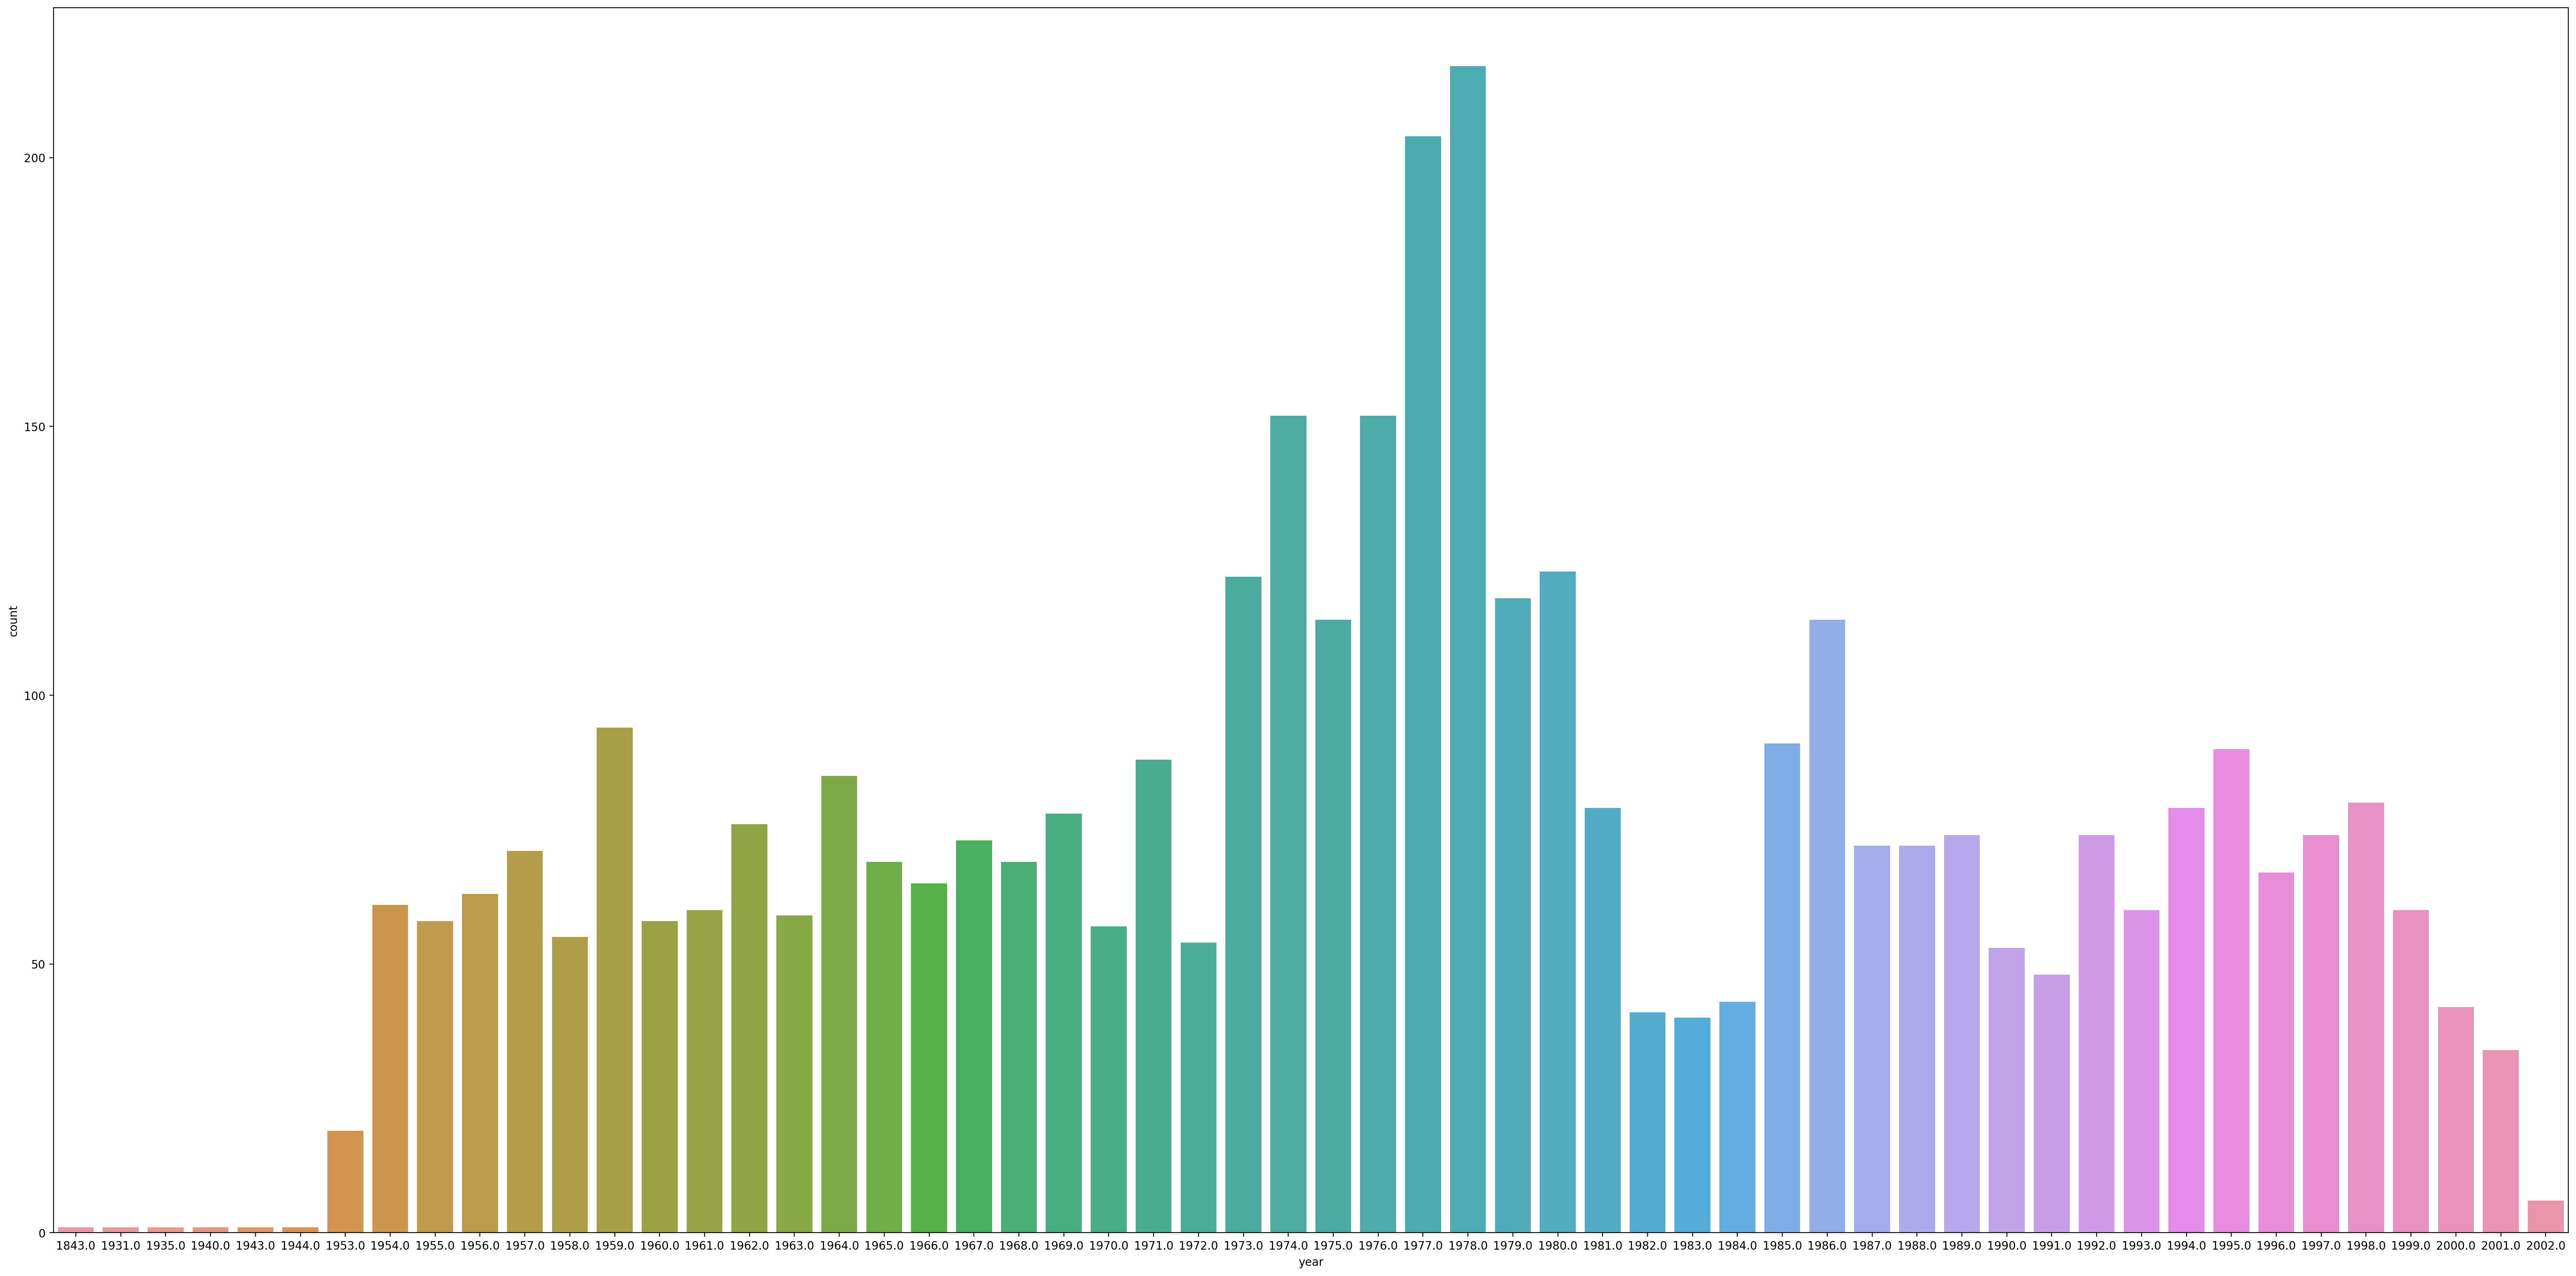

In [62]:
plt.figure(figsize=(40,20), dpi=200)
sns.countplot(data=Customer_Demographic, x='year')

## Customer_Address

In [63]:
Customer_Address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [64]:
Customer_Address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


<AxesSubplot:xlabel='postcode', ylabel='count'>

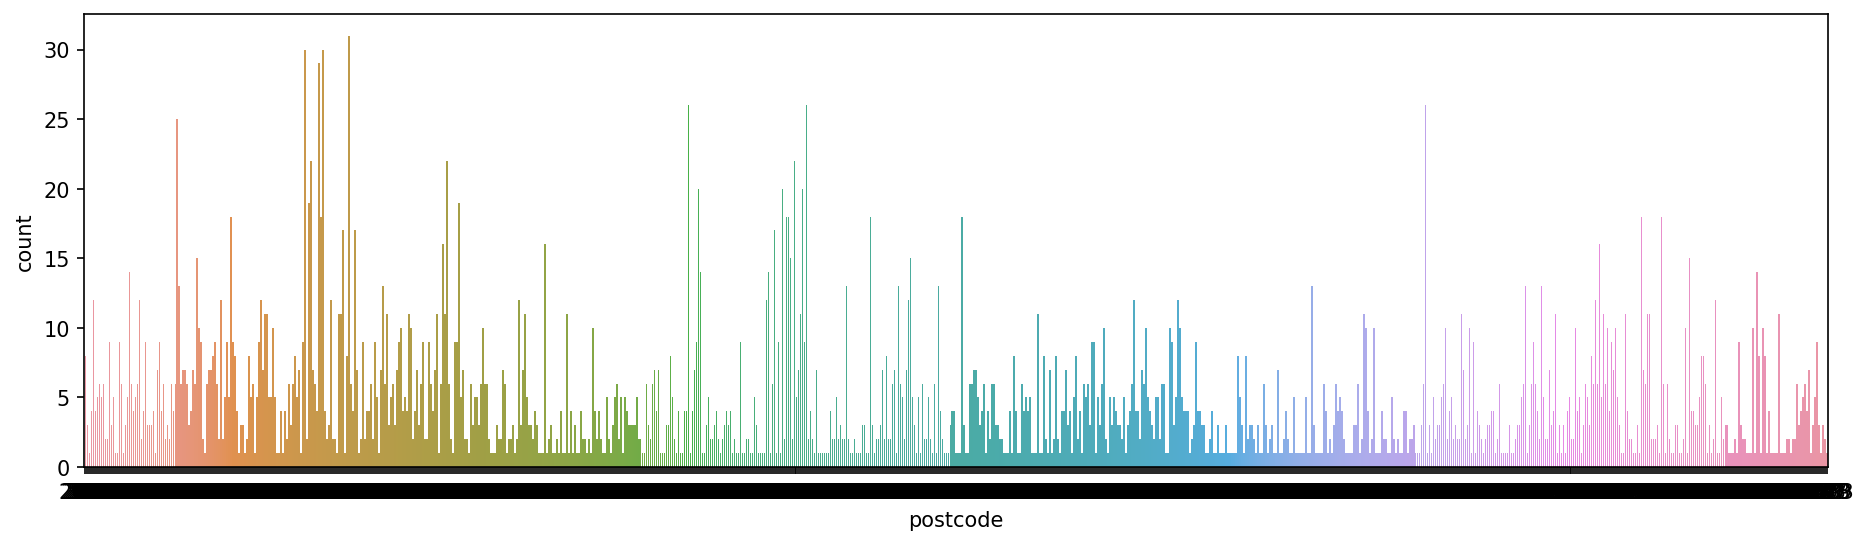

In [65]:
plt.figure(figsize=(15,4), dpi=150)
sns.countplot(data=Customer_Address, x='postcode')

<AxesSubplot:xlabel='state', ylabel='count'>

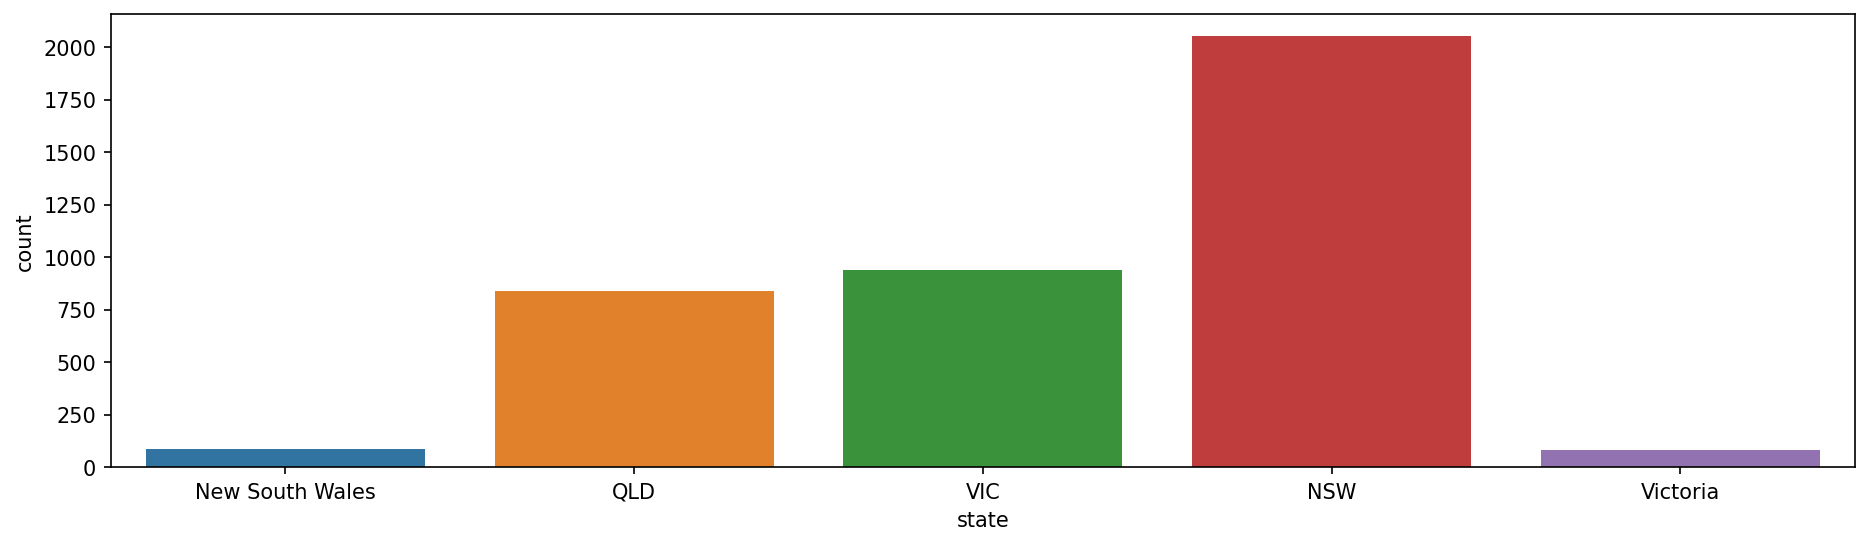

In [66]:
plt.figure(figsize=(15,4), dpi=150)
sns.countplot(data=Customer_Address, x='state')

<AxesSubplot:xlabel='property_valuation', ylabel='count'>

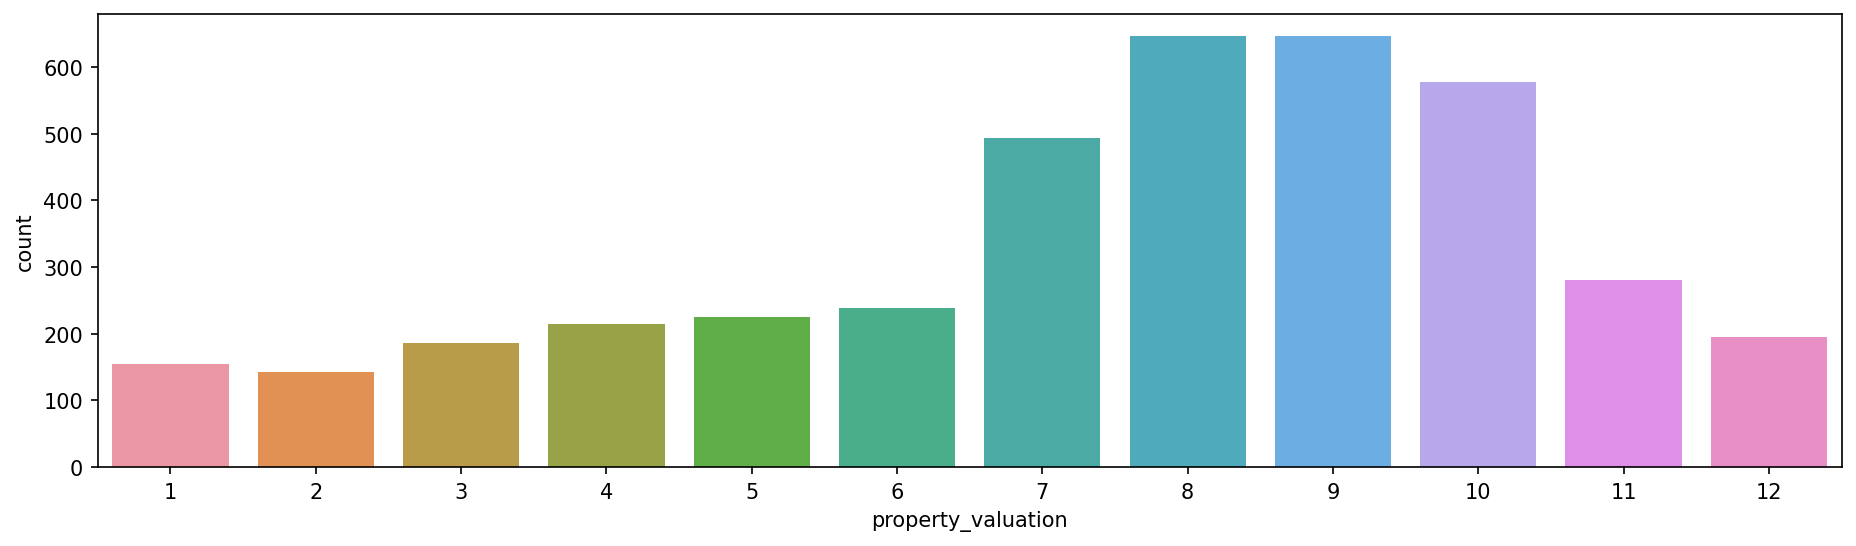

In [67]:
plt.figure(figsize=(15,4), dpi=150)
sns.countplot(data=Customer_Address, x='property_valuation')